# Flood Frequency Analysis: Frequency Factor Approach - Gumbel

------
DTR

## Task

Use the Gumbel Frequency Factor method to compute return periods and return levels


## Frequency Factors: General equation

\
Chow (1964) introduced the **general equation of flood frequency analysis** that uses the statistical parameters derived from the data and a frequency factor ($K_T$) value that is computed using the return period value of interest. 

The **general equation** is expressed as:

\begin{equation}
x_T = \bar{x} + K_T \cdot \sigma
\end{equation}


\
where $x_T$ is the return level at return period $T$ or the magnitude of flood at the specified or required return period, $K_T$ is the frequency factor, $\sigma$ is the standard deviation and $\bar{x}$ is the mean of the data. $\sigma$ and $\bar{x}$ are sample statistics


The formulation of $K_T$ is dependant on the parametric distribution and return period as already pointed out. 


## Gumbel Frequency Factor, $K_T$

The frequency factor $K_T$ can be determined by two methods. i.e 

1. Using a Frequency Factor Table

2. Using a formula proposed by Van Te Chow that summarises the table.

Here we will implement the formula proposed by Van Te Chow, whereby $K_T$ is computed as follows:

\begin{equation}
K_T = - \frac{\sqrt{6} }{\pi} \bigg\{ 0.5772 + \ln\left[ln \Big( \frac{T}{T-1} \Big) \right]  \bigg\}
\end{equation}


The formula depends on $T$ - the return period that you want to calculate!!


# We compute

# Import Modules/Packages to Use

In [11]:
# so we need pandas for importing data
import pandas as pd 

In [12]:
#for plotting
import matplotlib.pyplot as plt

In [13]:
import numpy as np

In [14]:
# for looking at distributions
import scipy.stats as scistats

In [15]:
#ecdf
import statsmodels.distributions

In [16]:
#import openturns as ot

In [17]:
import scienceplots #for that special plotting touch

In [18]:
#a good to have utility package is os
import os

In [19]:
#number of cores
os.cpu_count()

12

# Directory Management

All notebooks have this part. This helps with orientation and knowing where you are

In [20]:
## get the current working directory
os.getcwd()

'C:\\Users\\drwas\\Documents\\UZ_2023_Hydrology_BSc'

# Importing Data

In [21]:
data_dir = './DATA/'

In [22]:
fname = "Upstream_Catch_AMAX_Q.xlsx"

In [23]:
fname_AMAX = os.path.join(data_dir, fname)
fname_AMAX

'./DATA/Upstream_Catch_AMAX_Q.xlsx'

In [24]:
os.path.isfile(fname_AMAX)

False

In [26]:
#read in the data
# we will index the file on reading it, using index_col

df_AMAX = pd.read_excel( fname_AMAX, index_col =0 )

In [27]:
#view first five
df_AMAX.head(5)

,AMAX_Q
years,
1940,199.0
1941,160.6
1942,136.3
1943,458.4
1944,200.7


In [28]:
type(df_AMAX)

pandas.core.frame.DataFrame

In [29]:
#data columns
df_AMAX.columns

Index(['AMAX_Q'], dtype='object')

## Descriptive Stats

In [30]:
### Inst. Peaks
df_AMAX.AMAX_Q.describe()

count     75.000000
mean     176.322667
std       85.783134
min       41.900000
25%      120.900000
50%      160.300000
75%      214.050000
max      458.400000
Name: AMAX_Q, dtype: float64

In [31]:
df_AMAX.index.min(), df_AMAX.index.max()

(1940, 2014)

## Plot the data

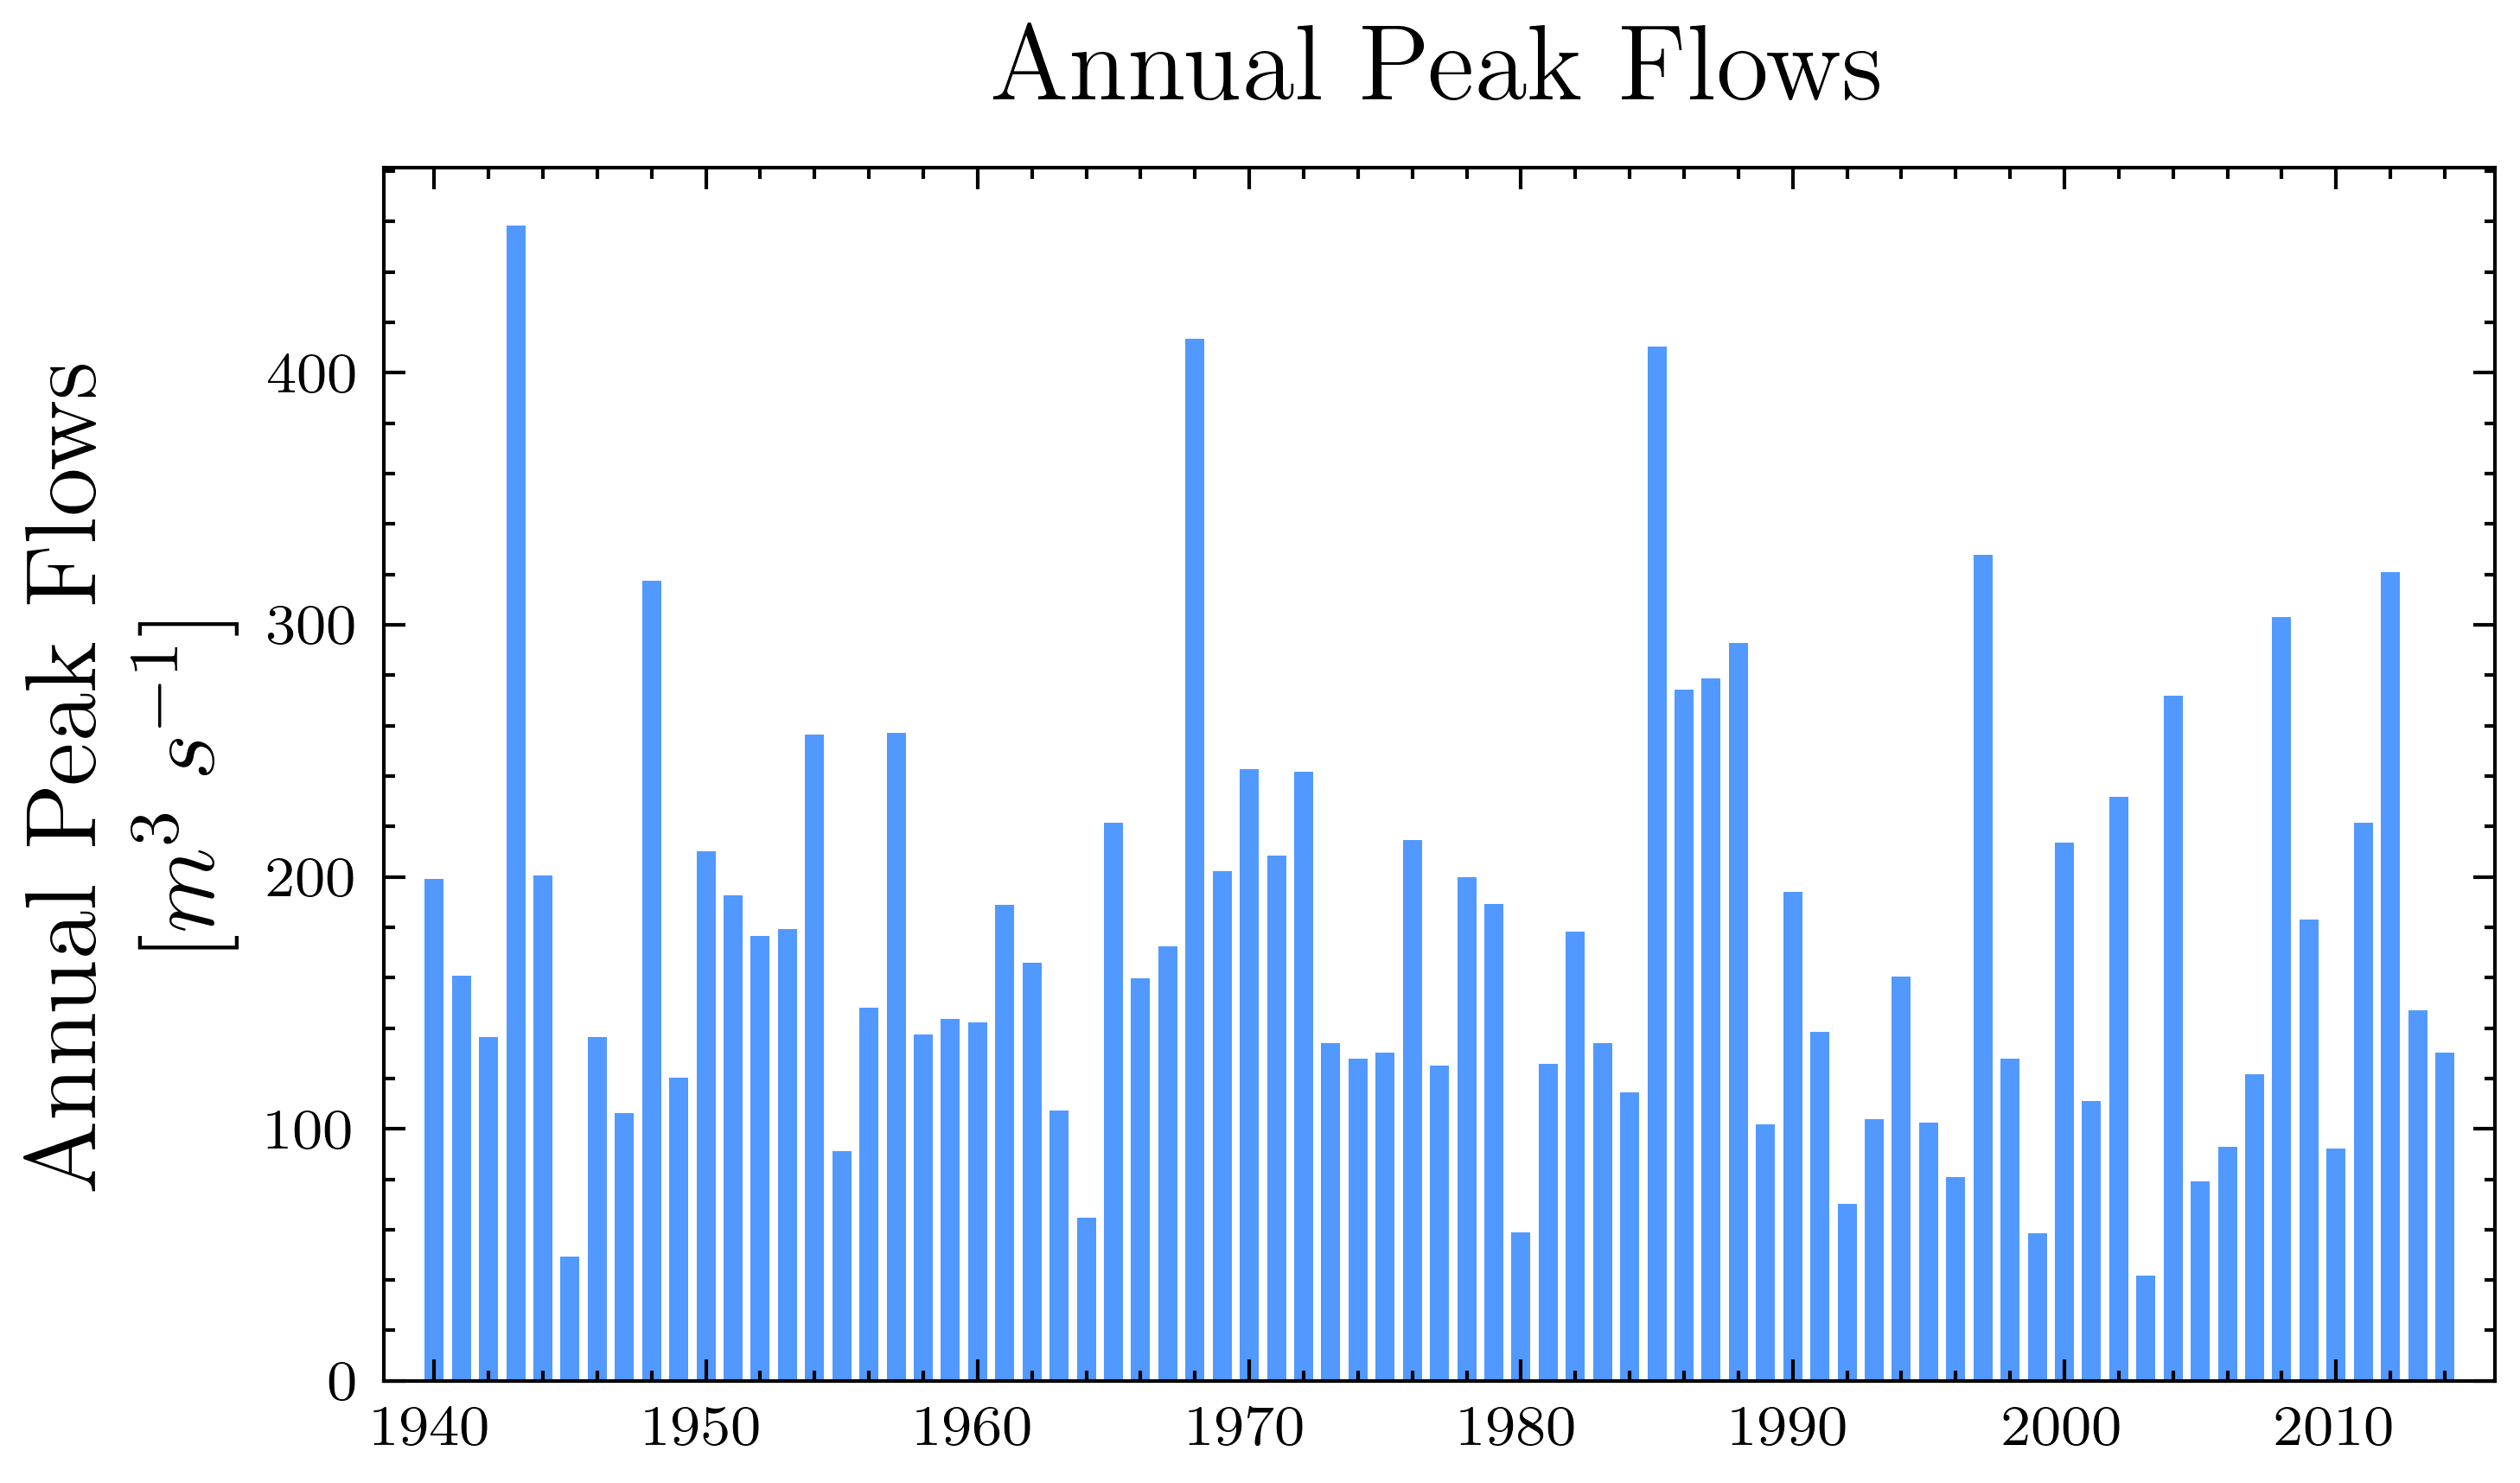

In [98]:

## Will use scienceplots for that extra touch


with plt.style.context(['science', 'ieee']):
    ## Intitialize the figure object and define the size with figsize=(x,y)
    plt.figure(figsize=(5,3))
    ## plot the data as a bar graph
    plt.bar(df_AMAX.index, df_AMAX['AMAX_Q'], width=0.7, color="#5199FF" )
    ## manage the manage, to deal with whitespace issues
    plt.margins(x=0.02)
    ## Label the axis
    plt.ylabel('Annual Peak Flows \n [$m^3 \; s^{-1}$]', fontsize=14)
    ## add title
    plt.title('Annual Peak Flows', fontsize=15, y=1.02)
    plt.tight_layout()
    ## to save
    plt.savefig('Upstream_Catchment_01_AMAX_Obs.png', dpi=250)
    plt.show()

# Gumbel Distribution

Implicitly we are assuming that the data follows a Gumbel distribution because we have stated, apriori, that we are using the Gumbel frequency factor method. It does not hurt the check if the data follows the Gumbel distribution, but first what is the Gumbel distribution?

### What is the Gumbel Distribution? 

The Gumbel (Extreme Value Type I) distribution is one of a class of Generalized Extreme Value (GEV) distributions used for modeling extreme value problems. 

The Gumbel is a special case of the Extreme Value Type I distribution for maximums from distributions with “exponential-like” tails.


The Gumbel distribution is sometimes referred to as a type I Fisher-Tippett distribution (Extreme Value Theorem). It is also related to the extreme value distribution, log-Weibull and Gompertz distributions


The Gumbel Distribution (named for German mathematician Emil Julius Gumbel) has a long histrory of use in hydrology for modeling the occurrence of flood events.

It is also used for modeling maximum wind speed and rainfall rates.

It is a “fat-tailed” distribution - the probability of an event in the tail of the distribution is larger than if one used a Gaussian, hence the surprisingly frequent occurrence of 100-year floods. Floods were initially modeled as a Gaussian process, which underestimated the frequency of extreme events.

It is one of a class of extreme value distributions, the Generalized Extreme Value (GEV) distributions, which also includes the Weibull and Frechet - Extreme Value Theorem!!

References

Gumbel, E. J., “Statistics of Extremes,” New York: Columbia University Press, 1958.

## Goodness of Fit

There are various plots and goodness-of-fit statistics that can be used for this purpose.

Here we will use probability paper plots. If the data fits that particular distribution, it will plot as a straight line on that probability distribution's probability paper!!

## Basic Histogram

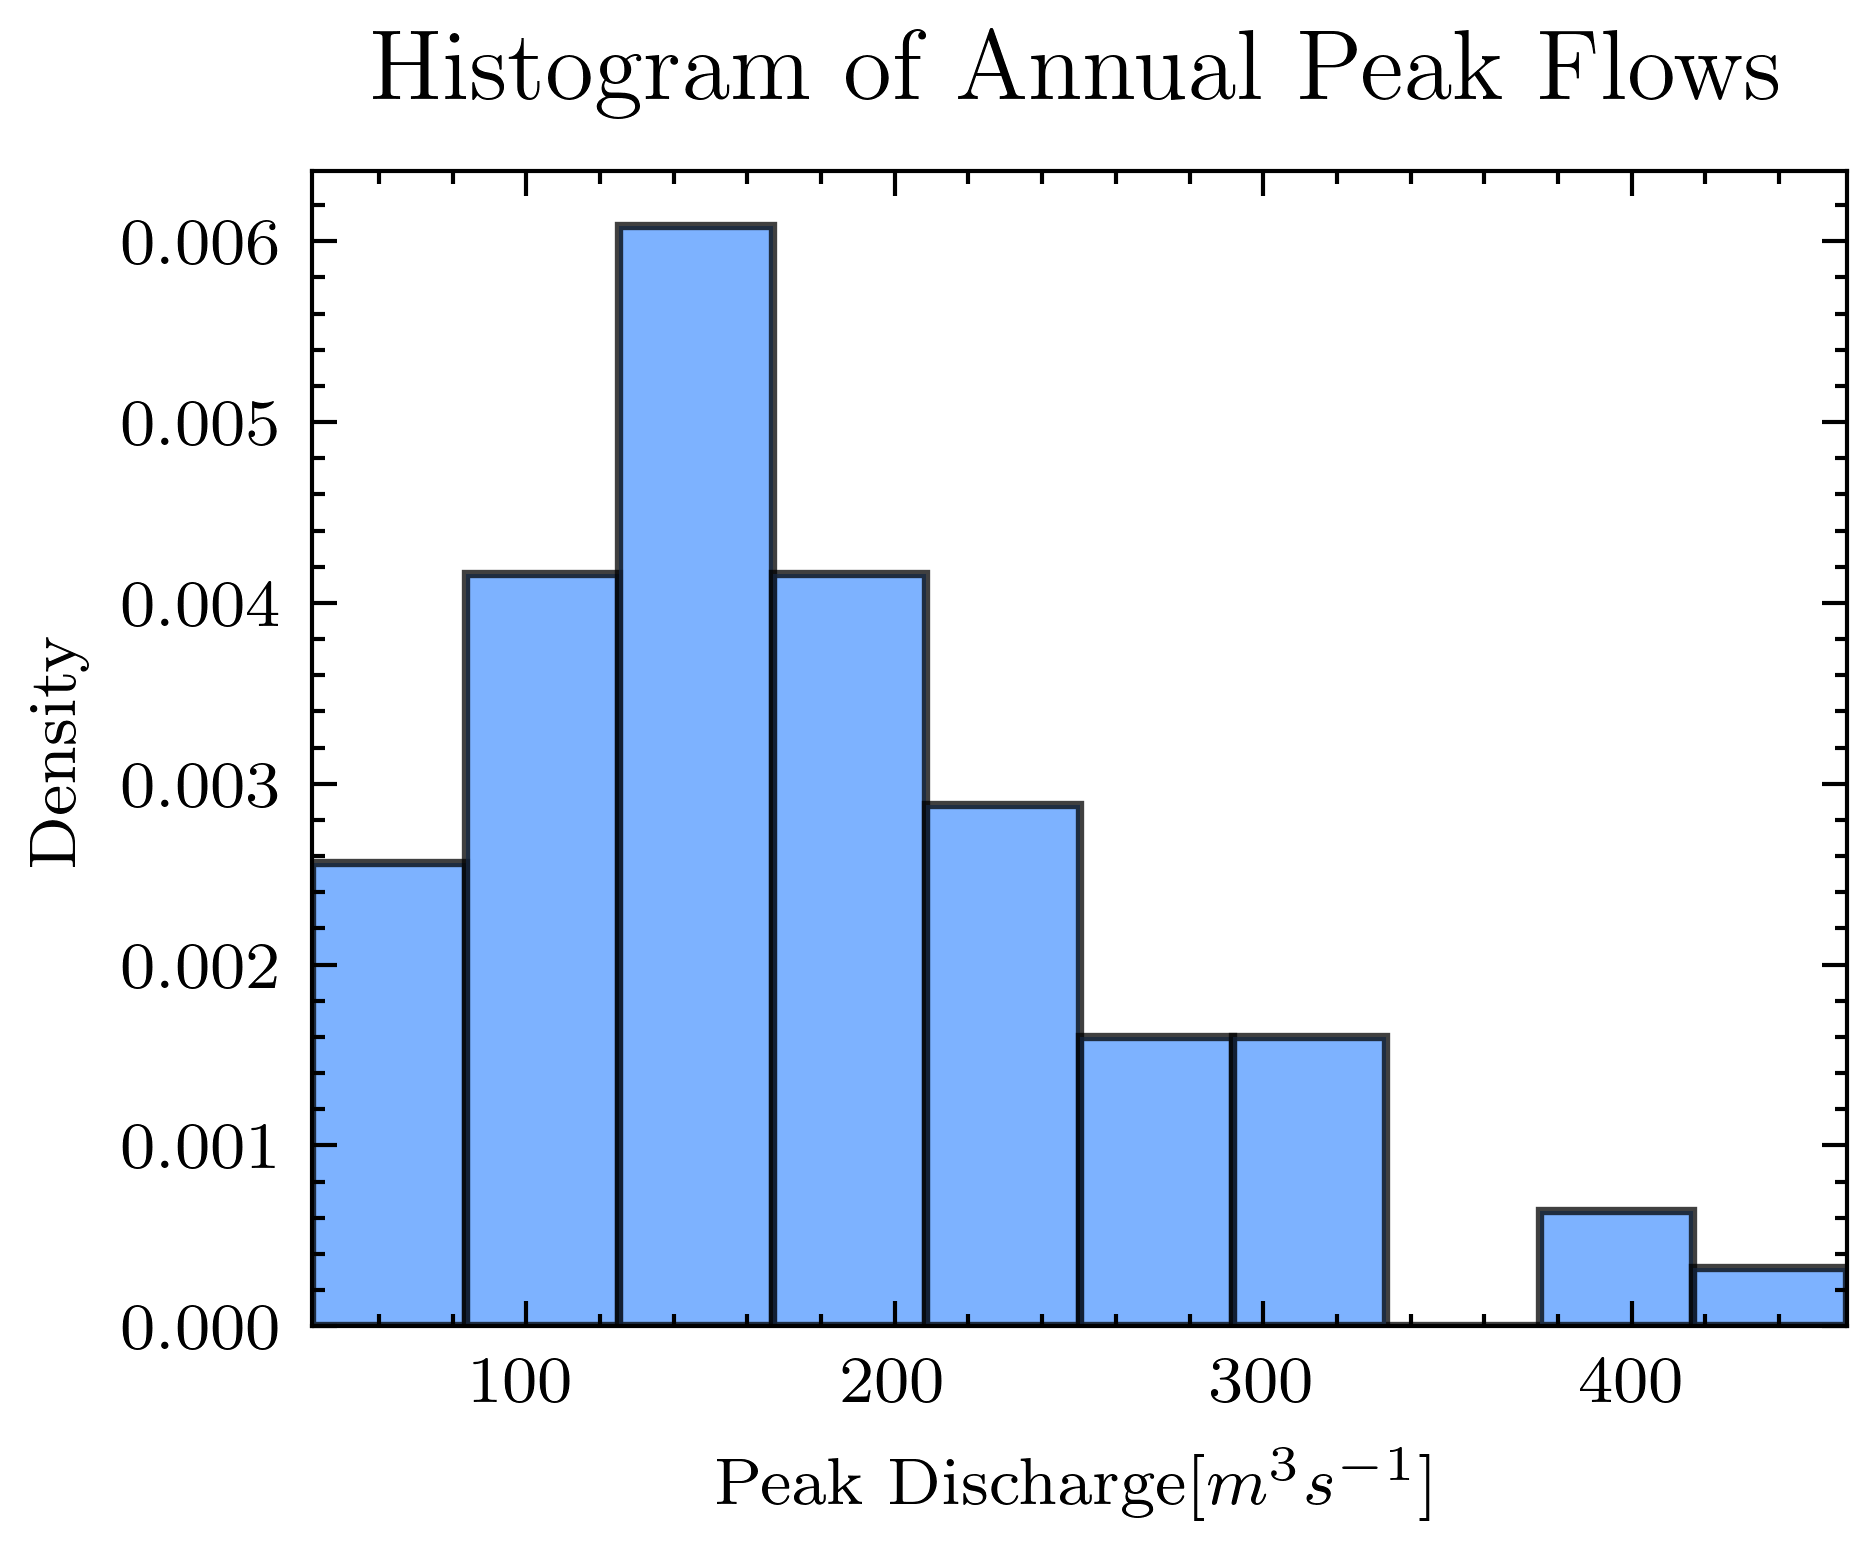

In [99]:
## Will use scienceplots for that extra touch
with plt.style.context(['science', 'ieee']):
    #plt.figure(figsize=(7,7))
    plt.hist(df_AMAX['AMAX_Q'], density=True, alpha=0.75, color="#5199FF", ec="black" )
    plt.margins(x=0)
    plt.xlabel('Peak Discharge[$m^3 s^{-1}$]')
    plt.ylabel('Density')
    plt.title('Histogram of Annual Peak Flows', fontsize=12, y=1.02)
    #save
    plt.savefig('Upstream_Catchment_02_Histogram.png', dpi=250)
    plt.show()

## Fit the Gumbel parameters


### Fit using scipy
Scipy has two methods for the Gumbel distribution. We will use the "Gumbel_r" method/function

The gumbel distribution has two parameters!

In [34]:
g_loc, g_scale  = scistats.gumbel_r.fit(df_AMAX['AMAX_Q'].values)
g_loc, g_scale

(138.03764958210053, 65.1602051550284)

You can also use openturns to fit distributions

## Visual Goodness of Fit Plots

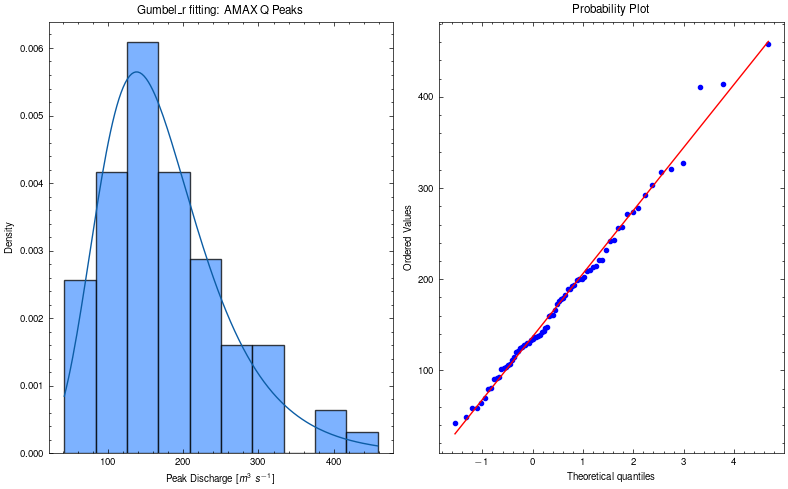

In [100]:
loc, scale = scistats.gumbel_r.fit( df_AMAX['AMAX_Q'].values)

## Will use scienceplots for that extra touch
with plt.style.context(['science', 'nature']):
    fig = plt.figure(figsize=(8,5) )
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    #### subplot 1
    ax1.hist(df_AMAX['AMAX_Q'].values, density=True, alpha=0.75, color="#5199FF", ec="black" )
    # fit and plot
    x = np.linspace(df_AMAX['AMAX_Q'].values.min(), df_AMAX['AMAX_Q'].values.max(), 150)
    ax1.plot(x, scistats.gumbel_r(loc, scale).pdf(x))
    ##add title
    ax1.set_title("Gumbel_r fitting: AMAX Q Peaks")
    ax1.set_xlabel("Peak Discharge [$m^3 \; s^{-1}$]")
    ax1.set_ylabel("Density")
    ##############################################################
    ## Subplot 2
    scistats.probplot(df_AMAX['AMAX_Q'].values, 
                          dist=scistats.gumbel_r, plot=ax2)
    #ax2.set_title("Probability plot of Q Peaks")
    
    plt.tight_layout()
    #save
    plt.savefig('Upstream_Catchment_03_Gumbel_Fitting.png', dpi=250)
    
    plt.show()

## ECDF

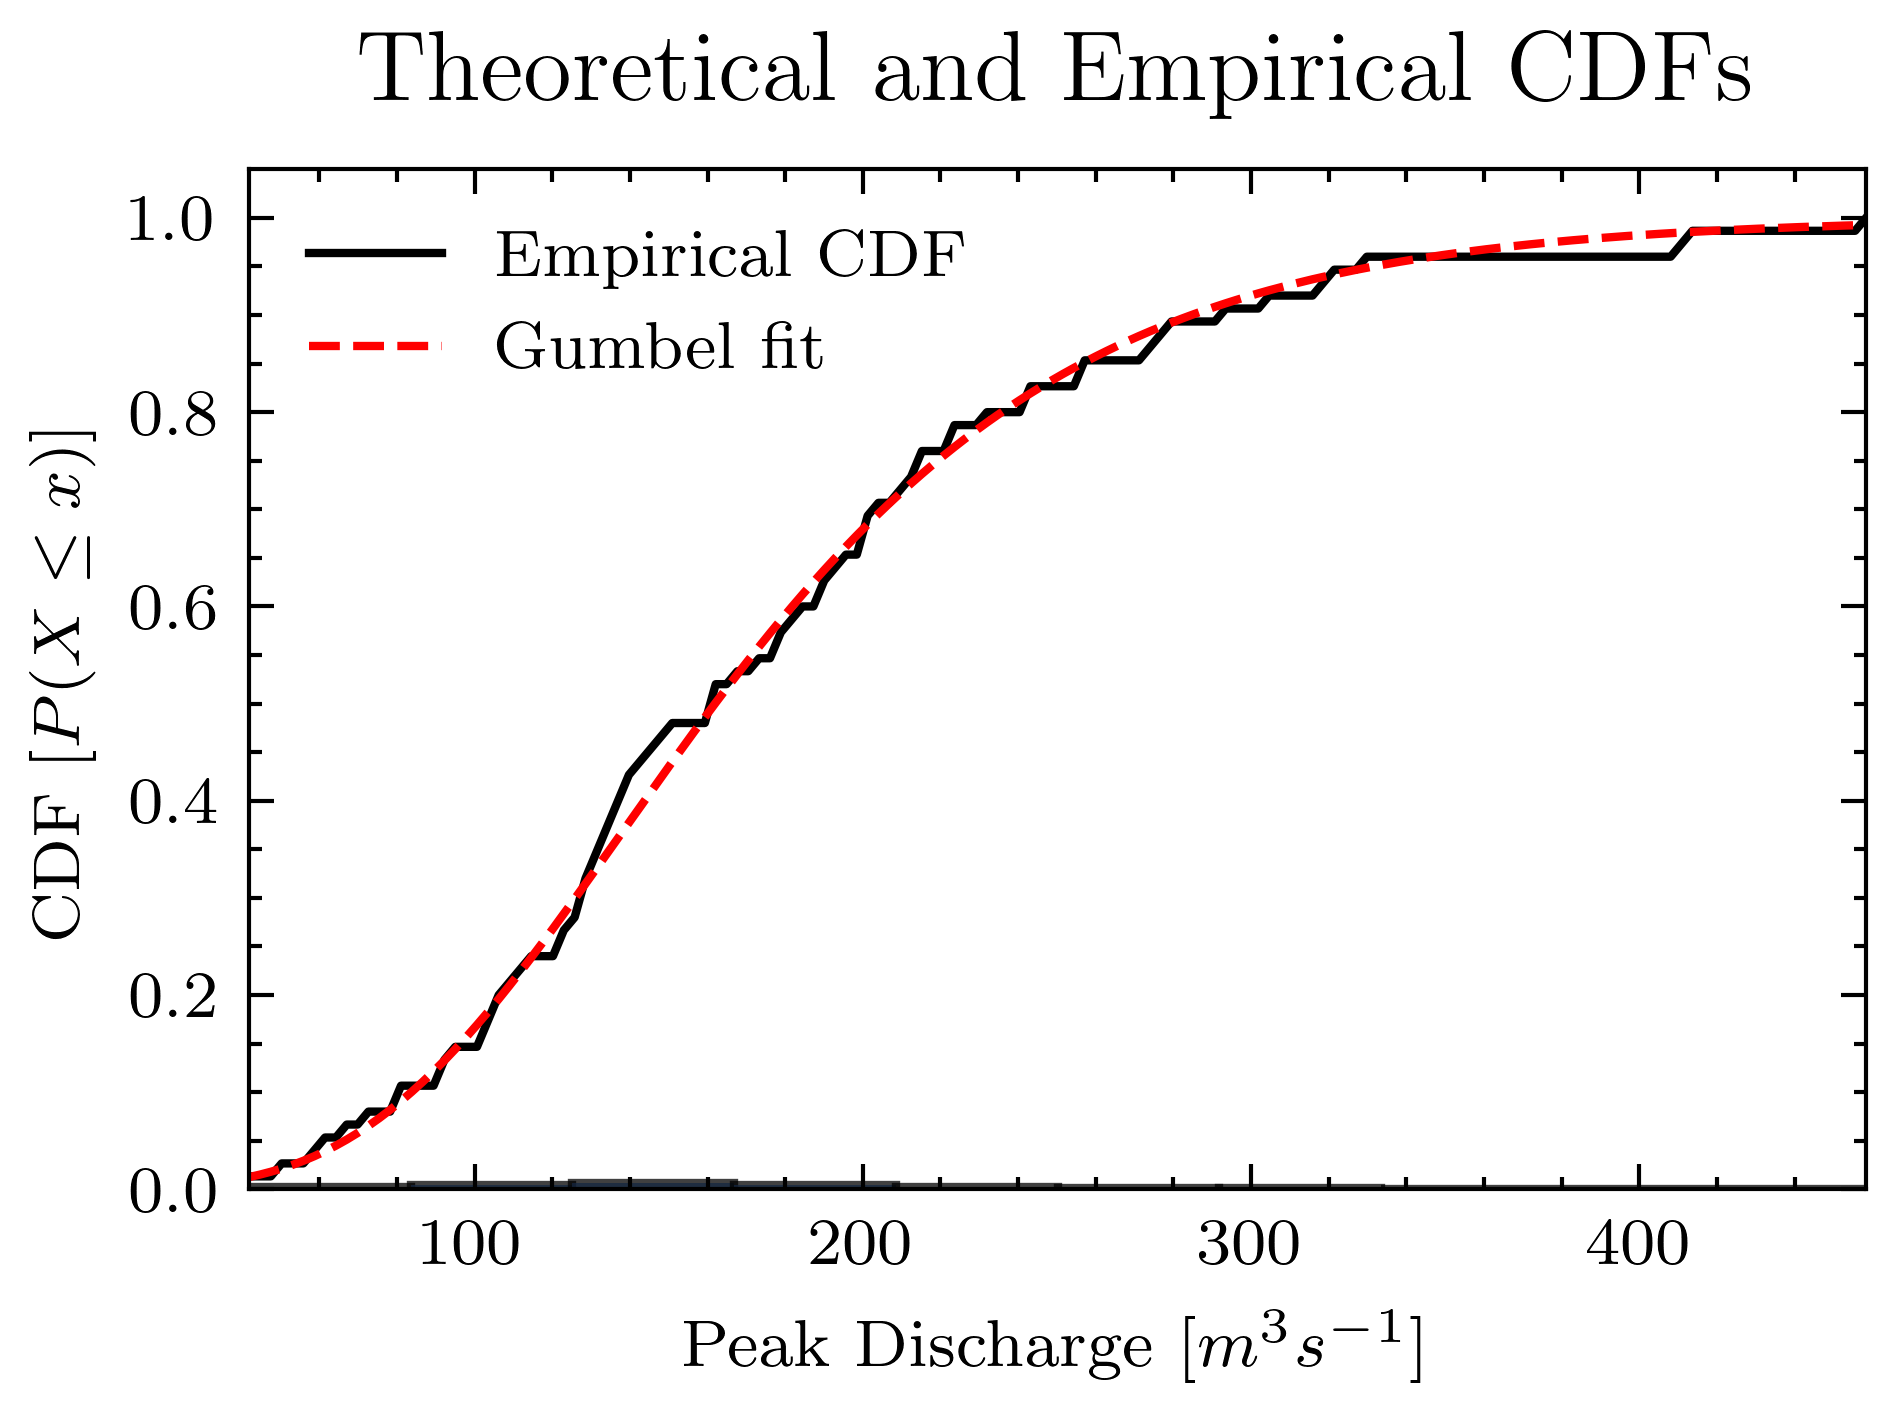

In [101]:
# compute ecdf
ecdf = statsmodels.distributions.ECDF(df_AMAX['AMAX_Q'].values)

## Will use scienceplots for that extra touch
with plt.style.context(['science', 'ieee']):
    #plt.figure(figsize=(7,7))
    plt.plot(x, ecdf(x), label="Empirical CDF")
    plt.plot(x, scistats.gumbel_r(loc, scale).cdf(x), label="Gumbel fit")
    plt.hist(df_AMAX['AMAX_Q'], density=True, alpha=0.75, color="#5199FF", ec="black" )
    plt.margins(x=0)
    plt.xlabel('Peak Discharge [$m^3 s^{-1}$]')
    plt.ylabel('CDF [$P(X \leq x)$]')
    plt.title('Theoretical and Empirical CDFs', fontsize=12, y=1.02)
    ## add legend
    plt.legend()
    ### tight
    plt.tight_layout()
    ##
    plt.savefig('Upstream_Catchment_04_AMAX_Theo_Empr_CDFs.png', dpi=250)
    plt.show()
    

Even though we had made an a priori choice of the Gumbel distribution, it seems the fit GOF testing supports the a priori choice.

# Gumbel Frequency Factor FFA

In [38]:
import statistics

Let's write a function to implement the Gumbel FFA method

In [39]:
def Gumbel_Frequency_Factor_FFA(EV_data, T_RP): 
    """
    Input
    -----------------------
    EVdata = Extreme Value timeseries
    T_RP      = Return Period
        
    Output
    --------------
    KT   = KT frequency factor
    RL   = Return Level
    T_RP    = Input Return Period
    """
    import statistics
    ## compute sample stats
       
    Ann_Max_std_sample = statistics.stdev( EV_data )
    Ann_Max_mean = EV_data.mean()
    #N_years = len( EV_data )
    ## Compute K_T - Gumbel 
    K_T = ((-np.sqrt(6)/(np.pi))*(0.5772 + np.log(np.log(T_RP/(T_RP-1))))).round(3)
    ## compute return level at return period T(T_RP)
    QT_rp = Ann_Max_mean + K_T*Ann_Max_std_sample
    ## 
    return round(QT_rp, 1), K_T, T_RP    # what to output

Test the function

In [40]:
Gumbel_Frequency_Factor_FFA(df_AMAX['AMAX_Q'], T_RP=50)

(398.7, 2.592, 50)

## List of Return Periods to compute 

In [41]:
## return periods we want to calculate for
RP_to_Calc = [ 2, 5, 10, 15, 20, 25, 30, 50, 75, 100, 150, 200, 250, 500, 750, 1000, 2000]  

In [42]:
len(RP_to_Calc)

17

## Output Table

We come up with an empty dataframe for storing the results of our calculations

In [46]:
df_Gumbel_FFA_OUTPUT = pd.DataFrame({'SttnName': [], 'RPeriod': [], 'RLevel': [], 'KT': [] })

In [47]:
df_Gumbel_FFA_OUTPUT  

,SttnName,RPeriod,RLevel,KT


## Loop, Calculate and Populate the Table

In [49]:

g_sttname = 'Upstream'  # just a name

for indx, rp_i in enumerate(RP_to_Calc ):
    
    print('Now working on the ',rp_i, 'return period' )
    #### calculate
    RL_Q, KTcalc, RP_yr = Gumbel_Frequency_Factor_FFA(df_AMAX['AMAX_Q'], T_RP=rp_i)
    
    #### add the the result to the dataframe using append
    # Append results as a Dict row to DataFrame
    new_row = {'SttnName': g_sttname, 'RPeriod': rp_i, 'RLevel': RL_Q, 'KT':KTcalc }
    
    df_Gumbel_FFA_OUTPUT = df_Gumbel_FFA_OUTPUT._append(new_row, ignore_index=True)
    
    
print('****************************')
print('... Completered Processing!!')    

Now working on the  2 return period
Now working on the  5 return period
Now working on the  10 return period
Now working on the  15 return period
Now working on the  20 return period
Now working on the  25 return period
Now working on the  30 return period
Now working on the  50 return period
Now working on the  75 return period
Now working on the  100 return period
Now working on the  150 return period
Now working on the  200 return period
Now working on the  250 return period
Now working on the  500 return period
Now working on the  750 return period
Now working on the  1000 return period
Now working on the  2000 return period
****************************
... Completered Processing!!


The results:

In [52]:
df_Gumbel_FFA_OUTPUT

,SttnName,RPeriod,RLevel,KT
0,Upstream,2.0,162.3,-0.164
1,Upstream,5.0,238.0,0.719
2,Upstream,10.0,288.3,1.305
3,Upstream,15.0,316.6,1.635
4,Upstream,20.0,336.4,1.866
5,Upstream,25.0,351.7,2.044
6,Upstream,30.0,364.1,2.189
7,Upstream,50.0,398.7,2.592
8,Upstream,75.0,426.0,2.911
9,Upstream,100.0,445.4,3.137


## Plott the results

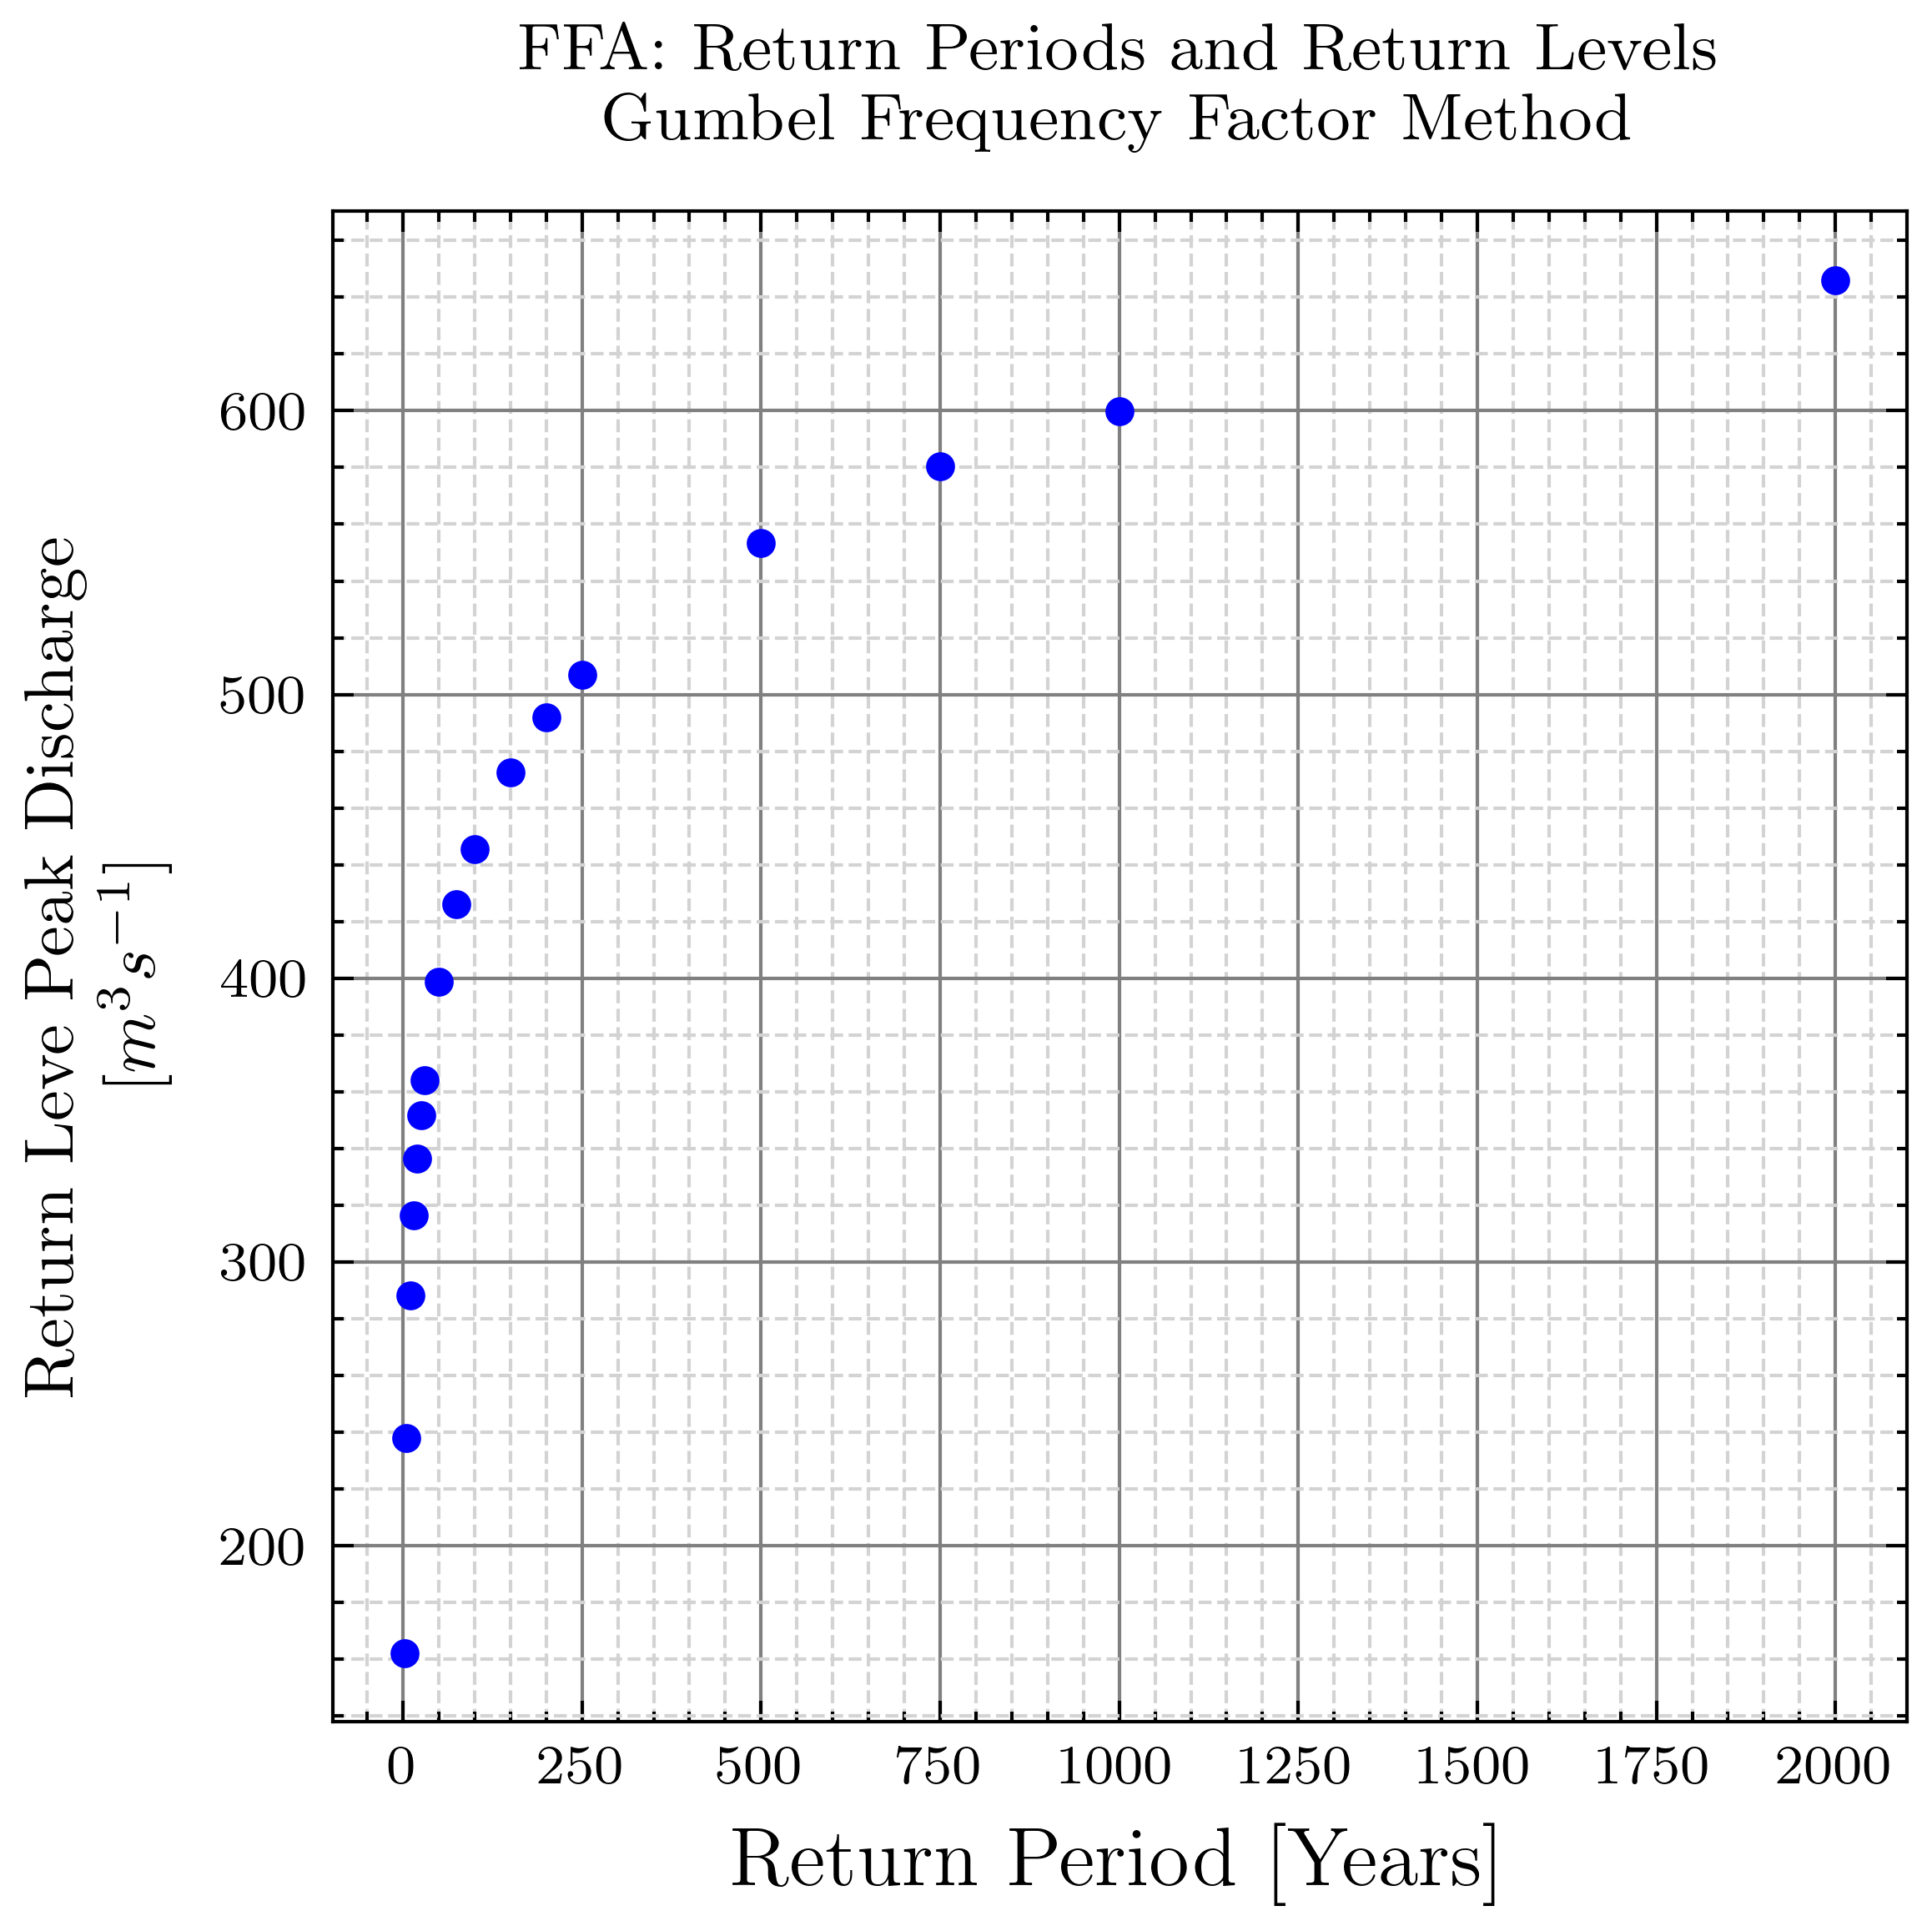

In [103]:
## Will use scienceplots for that extra touch
with plt.style.context(['science', 'ieee']):
    #plt.figure(figsize=(7,7))
    plt.figure(figsize=(4,4) )
    ####
    plt.scatter( df_Gumbel_FFA_OUTPUT['RPeriod'], df_Gumbel_FFA_OUTPUT['RLevel'],
                 label="Gumbel Frequency Factor Method", s=10, color='blue', zorder=15)
    ### label
    plt.ylabel("Return Leve Peak Discharge \n [$m^3 s^{-1}$]", labelpad=7, fontsize=10)
    ###
    plt.xlabel("Return Period [Years]", fontsize=12)
    #### margins
    #plt.margins(y=0)
    ###   add grid
    plt.minorticks_on()
    #plt.grid()
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='--')
    ######  Add legend
    #plt.legend(loc=4, fontsize=12, frameon=False)
    ####
    plt.title("FFA: Return Periods and Return Levels \n Gumbel Frequency Factor Method", y=1.02 )
    ########

    plt.tight_layout()
    ### save the figure
    plt.savefig(' Upstream_Catchment_05_RP_RL.png', dpi=200  )
    
    plt.show()

Semilog - x plot

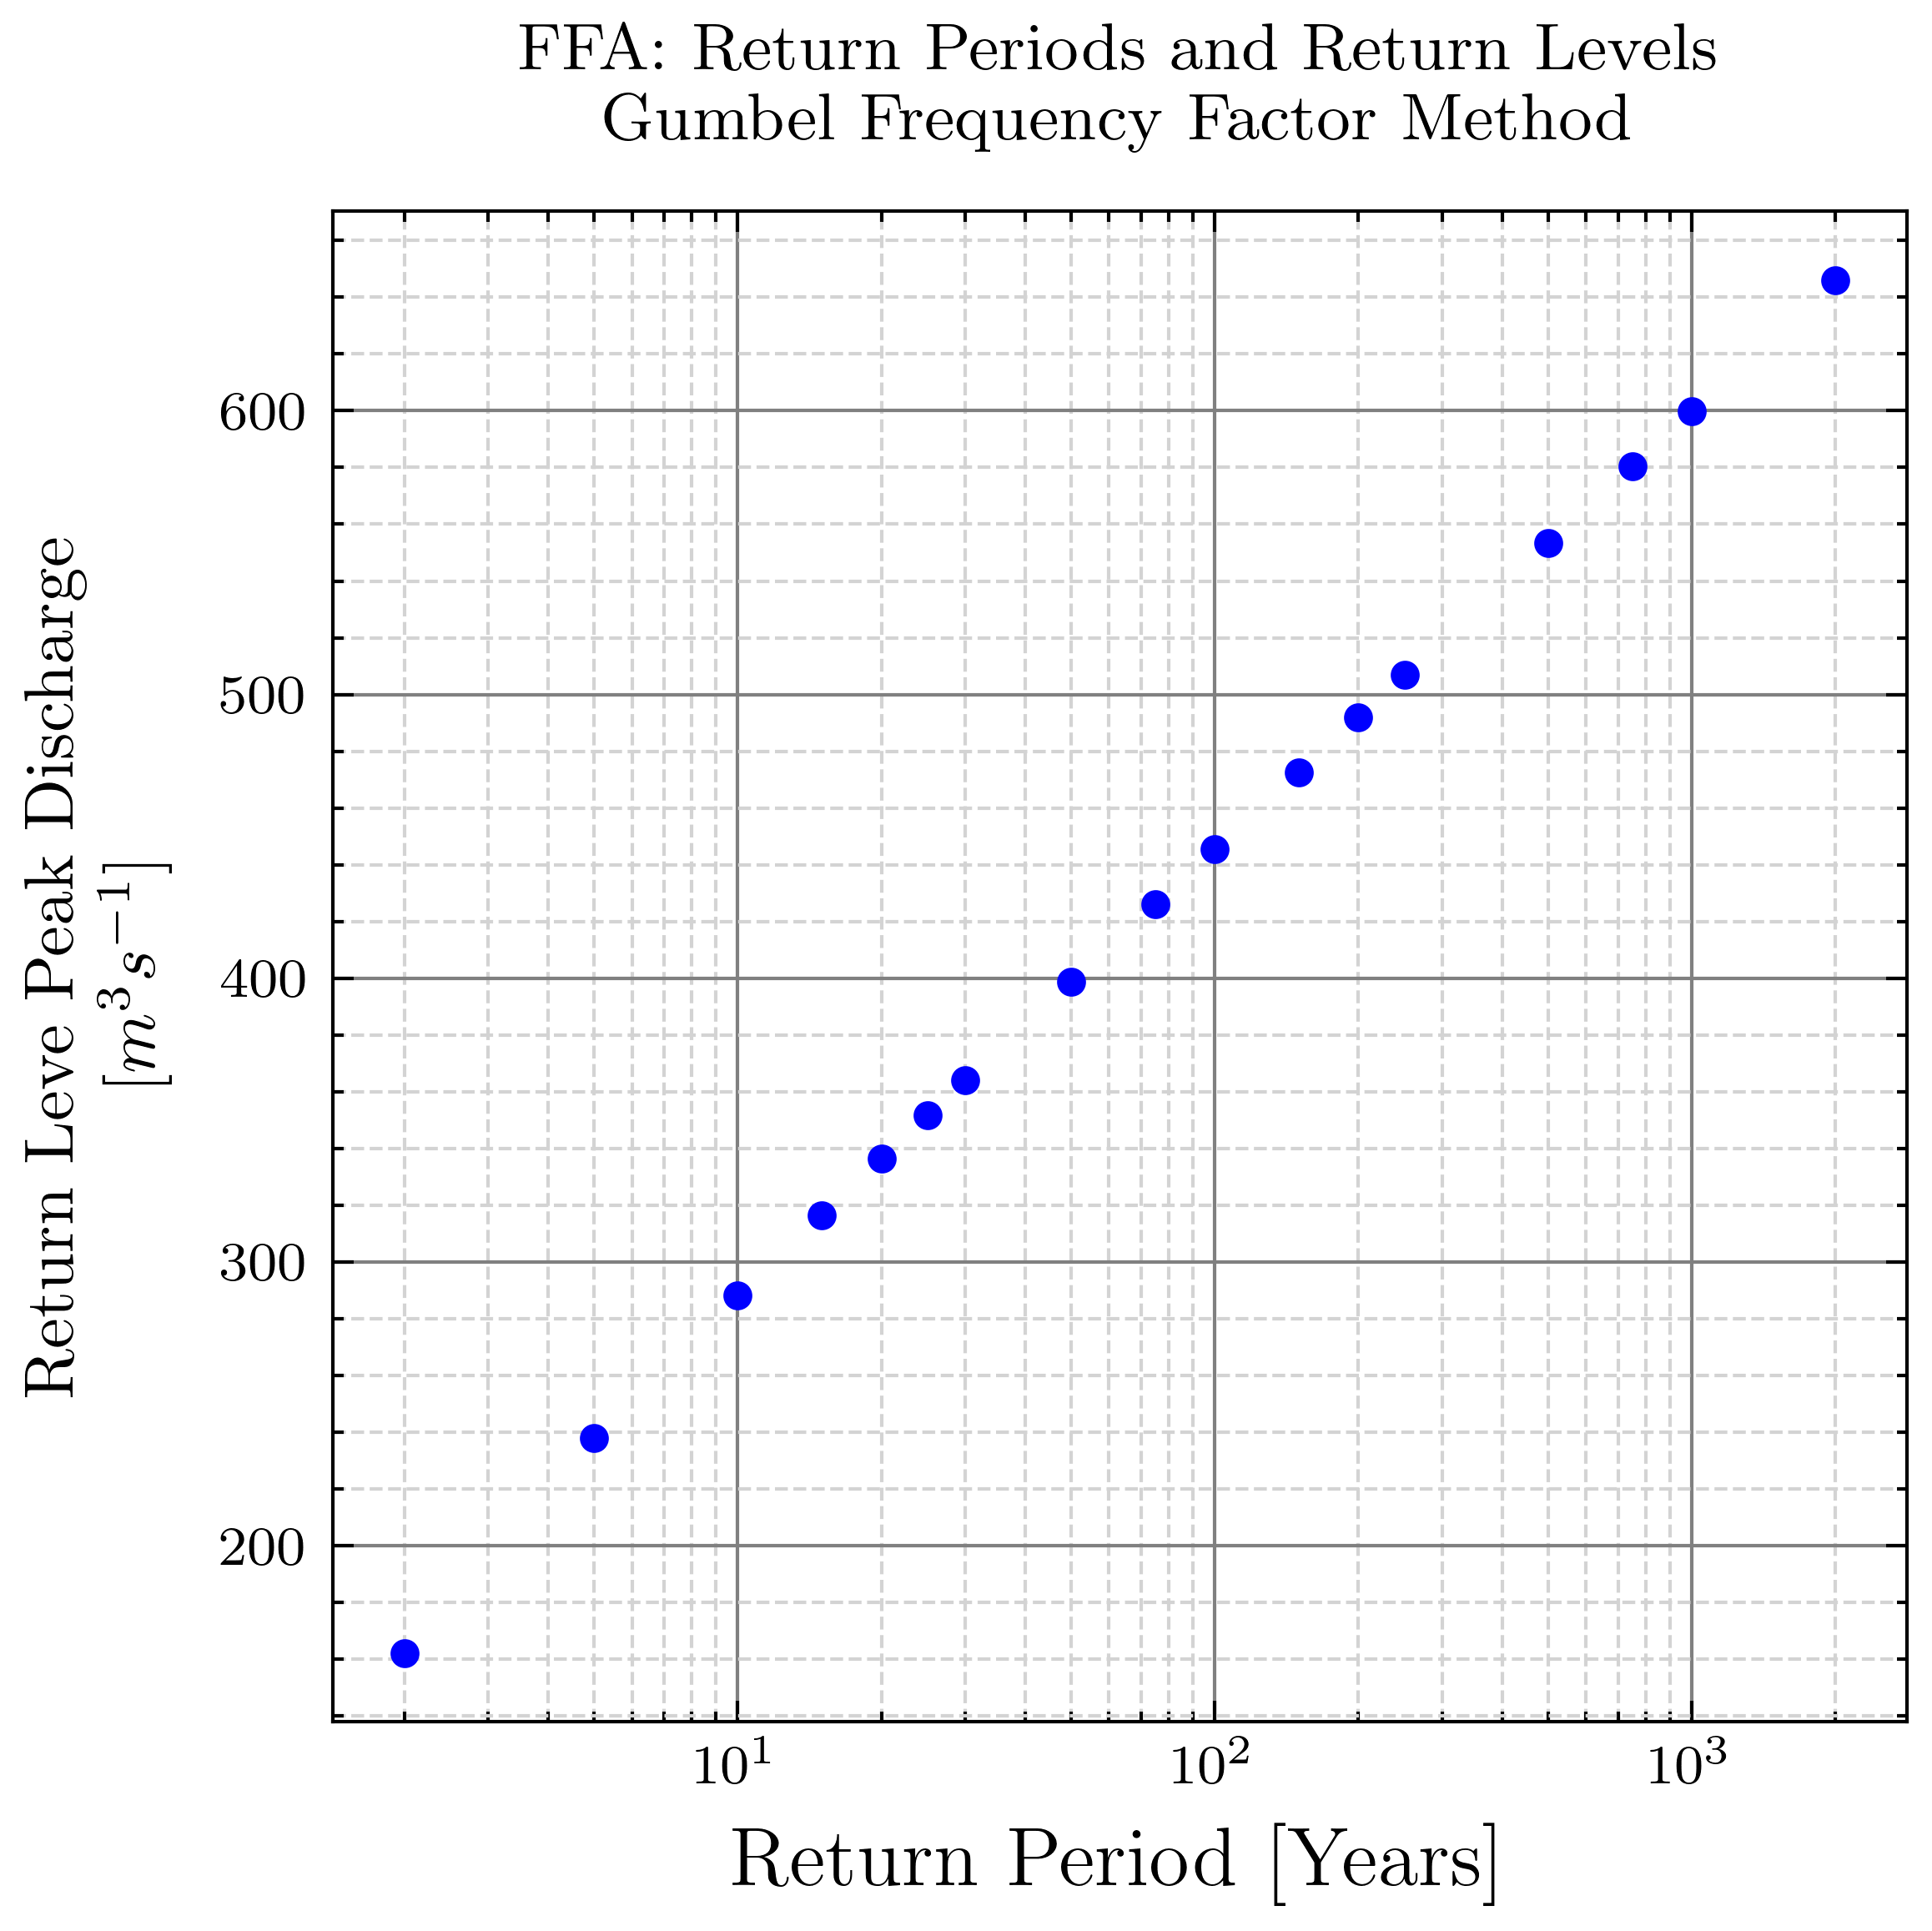

In [104]:
## Will use scienceplots for that extra touch
with plt.style.context(['science', 'ieee']):
    #plt.figure(figsize=(7,7))
    plt.figure(figsize=(4,4) )
    ####
    plt.scatter( df_Gumbel_FFA_OUTPUT['RPeriod'], df_Gumbel_FFA_OUTPUT['RLevel'],
                 label="Gumbel Frequency Factor Method", s=10, color='blue', zorder=15)
    ### label
    plt.ylabel("Return Leve Peak Discharge \n [$m^3 s^{-1}$]", labelpad=7, fontsize=10)
    ###
    plt.xlabel("Return Period [Years]", fontsize=12)
    
    plt.semilogx()
    ###   add grid
    plt.minorticks_on()
    #plt.grid()
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='--')
    ######  Add legend
    #plt.legend(loc=4, fontsize=12, frameon=False)
    ####
    plt.title("FFA: Return Periods and Return Levels \n Gumbel Frequency Factor Method", y=1.02 )
    ########

    plt.tight_layout()
    ### save the figure
    plt.savefig( 'Upstream_Catchment_05_RP_RL_semilogx.png', dpi=200  )
    
    plt.show()

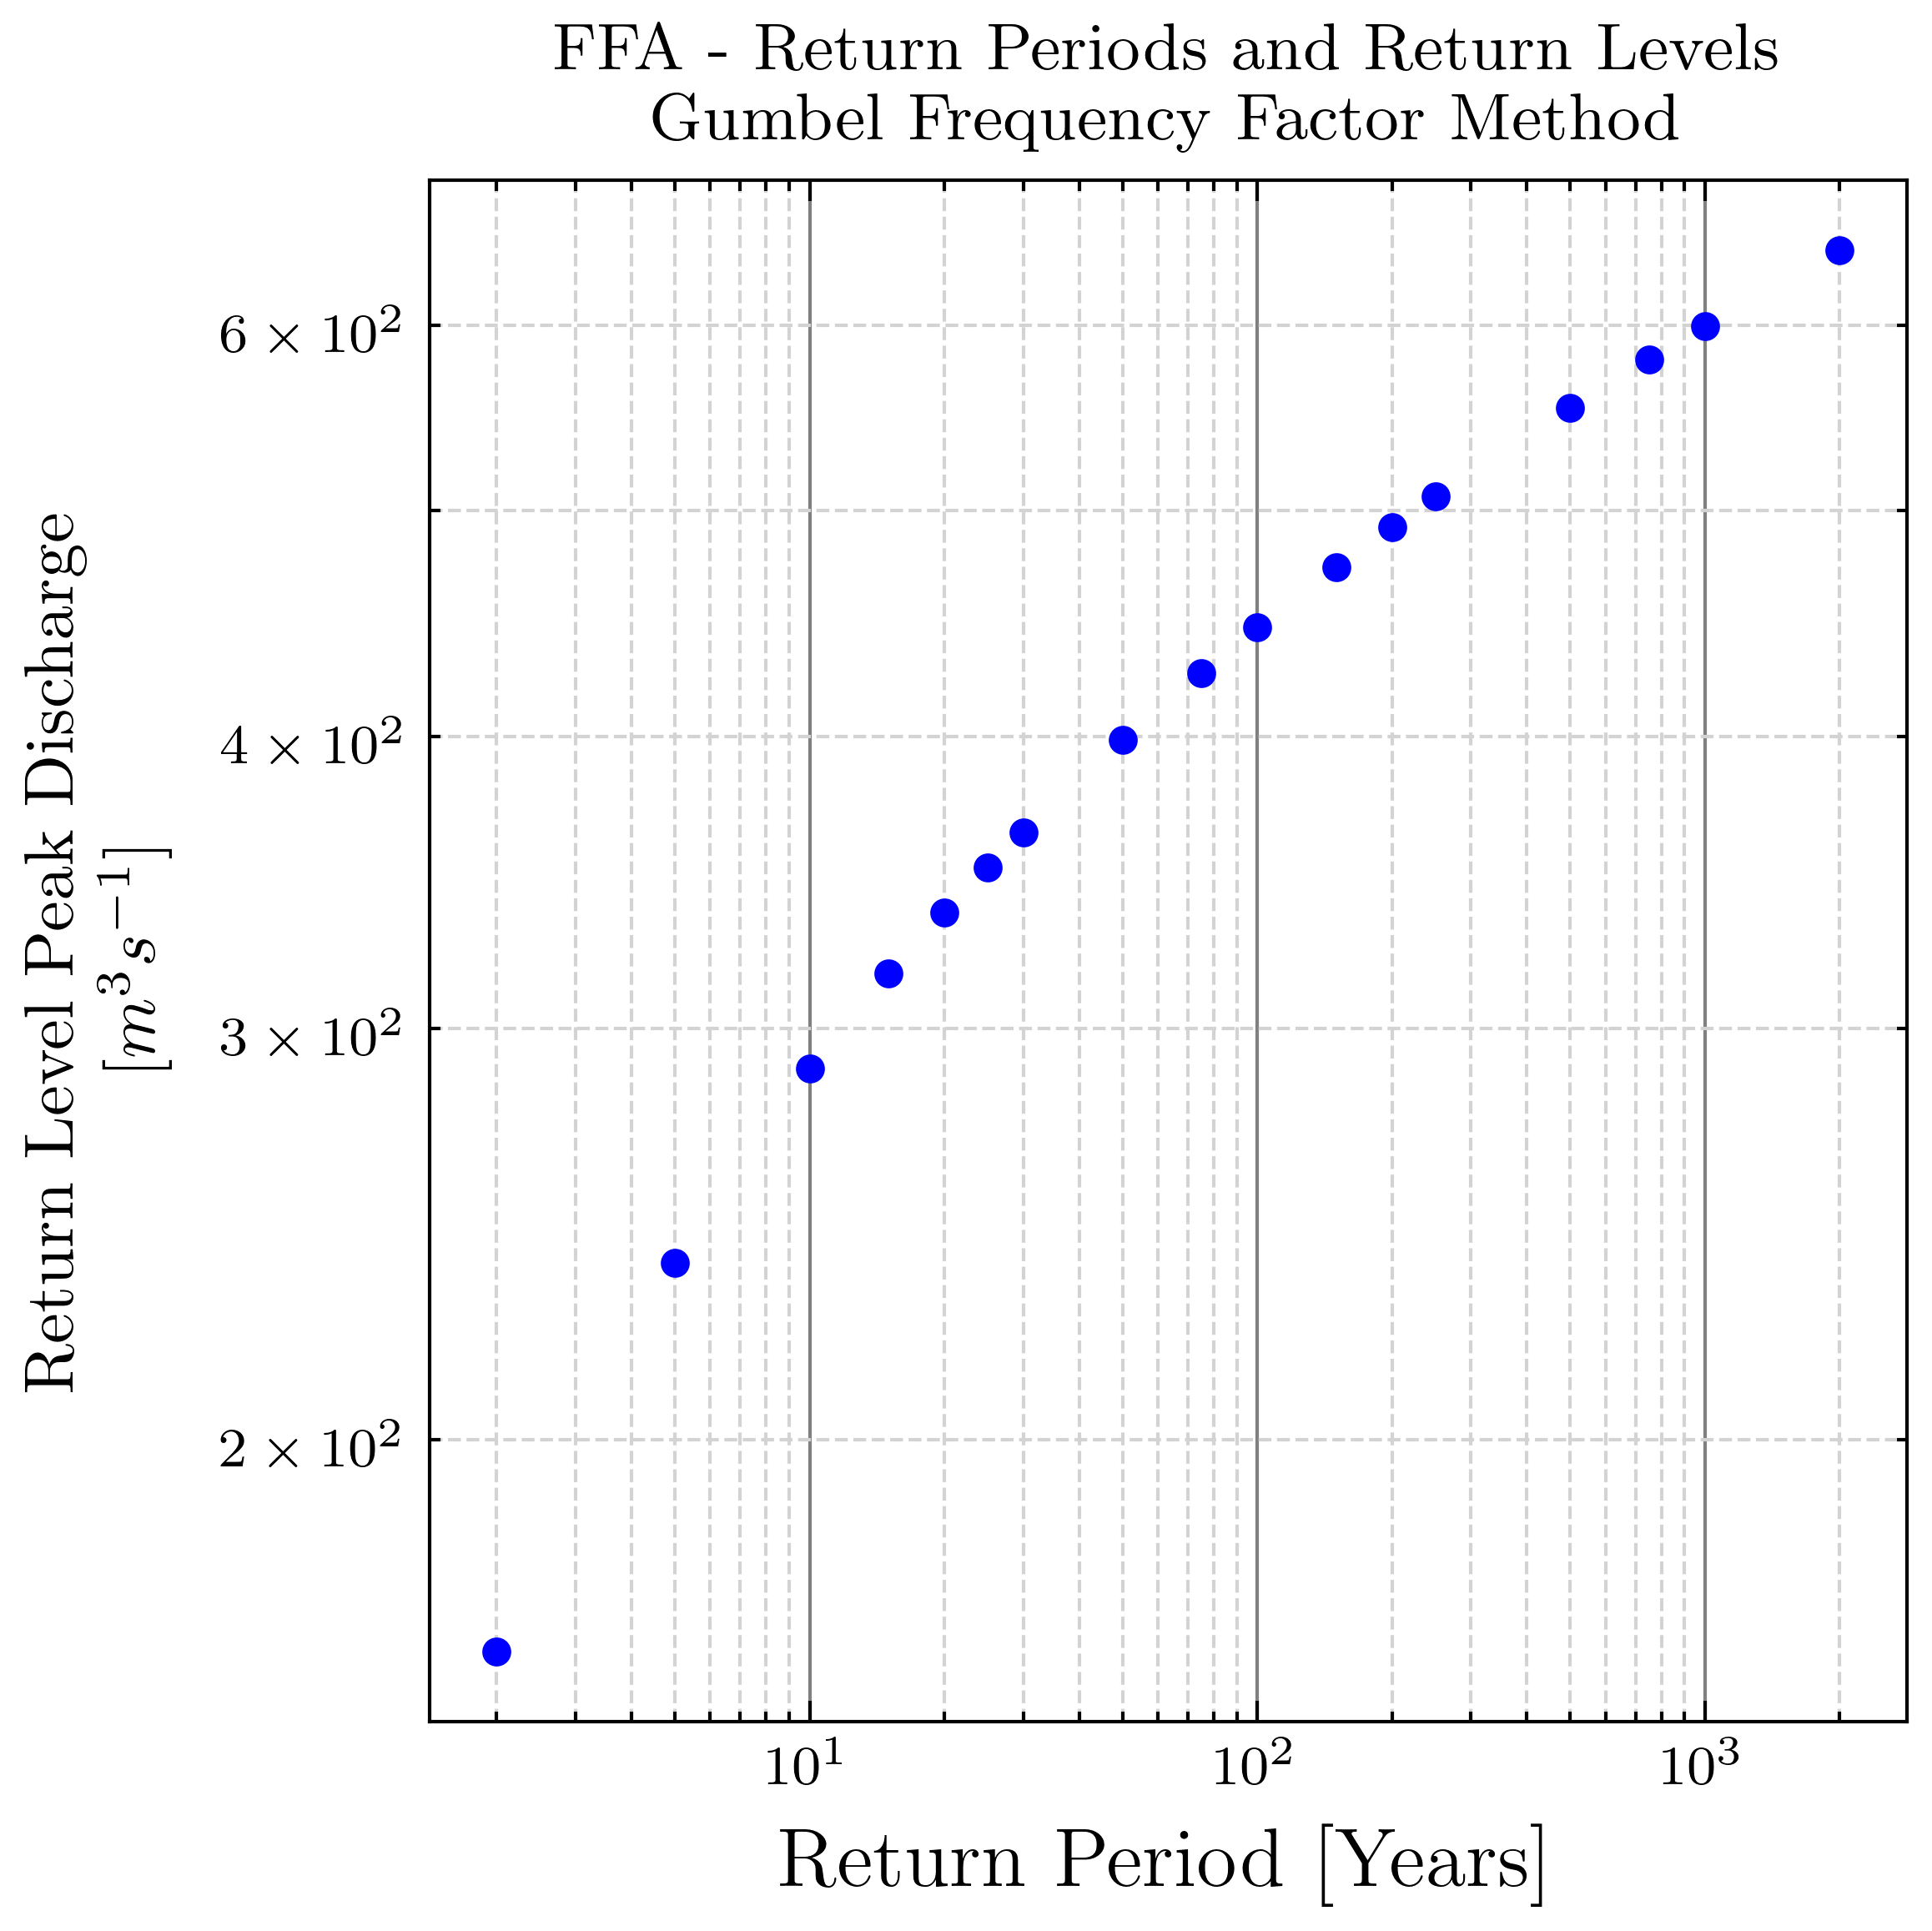

In [106]:
## Will use scienceplots for that extra touch
with plt.style.context(['science', 'ieee']):
    #plt.figure(figsize=(7,7))
    plt.figure(figsize=(4,4) )
    ####
    plt.scatter( df_Gumbel_FFA_OUTPUT['RPeriod'], df_Gumbel_FFA_OUTPUT['RLevel'],
                 label="Gumbel Frequency Factor Method", s=10, color='blue', zorder=15)
    ### label
    plt.ylabel("Return Level Peak Discharge \n [$m^3 s^{-1}$]", labelpad=7, fontsize=10)
    ###
    plt.xlabel("Return Period [Years]", fontsize=12)
    ## log axis
    plt.loglog()
    ###   add grid
    plt.minorticks_on()
    #plt.grid()
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='--')
    ######  Add legend
    #plt.legend(loc=4, fontsize=12, frameon=False)
    ####
    plt.title("FFA - Return Periods and Return Levels \n Gumbel Frequency Factor Method", y=1.0 )
    ########

    plt.tight_layout()
    ### save the figure
    plt.savefig('Upstream_Catchment_07_RP_RL_loglog.png', dpi=200  )
    
    plt.show()